# An Introduction To Scripting in Python 3

https://github.com/jvdkwast/Python3_Jupyter_Notebook/blob/7fa1d238d56b8baa6f19a90a37c273f8699c2bad/PythonIntro.ipynb

# **Python Namespace and Scope**

Python namespaces - the structures used to organize the symbolic names assigned to objects in a Python program.


Virtually everything that your Python program creates or acts on is an object.

Any assignment statement creates a symbolic name that you can use to reference an object.

If we declare a variable, it’s not merely a container for data; it’s a reference to a specific location in the computer’s memory where the actual data resides.

```python
some_var = 100

```

Python is creating an object with a datatype integer and value 100 which is securely stored somewhere in the computer's memory, and *some_var* now points to the starting memory address of that storage location.

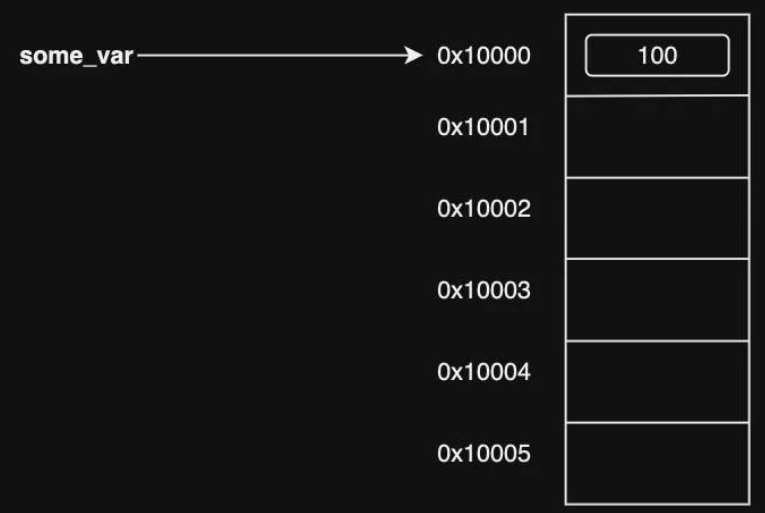

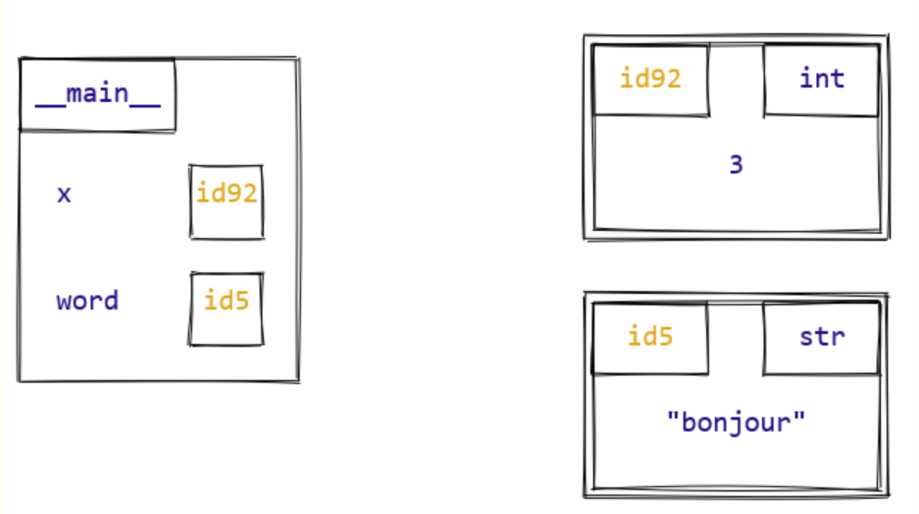

Representing compound data:

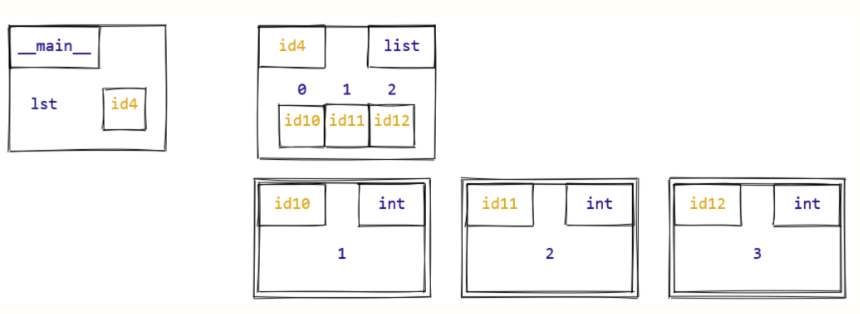

A namespace is a collection of currently defined symbolic names along with information about the object that each name references.

A namespace allows us to use the same name for different variables or objects in different parts of your code, without causing any conflicts or confusion.

In a Python program, there are 4 types of namespaces:

* Built-In
* Global
* Enclosing
* Local

As Python executes a program, it creates namespaces as necessary and deletes them when they’re no longer needed -- > differing lifetimes.

### The **built-in namespace**

The **built-in namespace** contains the names of all of Python’s built-in objects. A namespace is created when we start the Python interprete. These are available at all times when Python is running. 

In [4]:
dir(__builtins__)[:10]

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BaseExceptionGroup',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError']

### The **global namespace** 

The **global namespace** contains any names defined at the level of the main program. Python creates the global namespace when the main program body starts, and it remains in existence until the interpreter terminates.
The interpreter also creates a *global namespace for any module* that your program loads with the *import* statement

### The **local namespace** & the **enclosing namespace**.

The interpreter creates a new namespace whenever a function executes. That namespace is **local** to the function and remains in existence until the function terminates.

You can also define one function inside another.

The namespace created for the nested function is the **local namespace**, and the namespace created for the outer functionis the **enclosing namespace**.

In [5]:
def outerF():
    print("I am within the enclosing namespace.")
    
    def nestedF():
        print("I am within the local namespace.")
        
    nestedF()
    print("I am within the enclosing namespace again.")
    
outerF()

I am within the enclosing namespace.
I am within the local namespace.
I am within the enclosing namespace again.


Suppose you refer to the name x in your code, and x exists in several namespaces. How does Python know which one you mean? -->by using the concept of scope. 

The **scope** of a name is the region of a program in which that name has meaning (where we can access a variable). The interpreter determines this at runtime based on where the name definition occurs and where in the code the name is referenced.

The interpreter searches for a name from the inside out, looking in the local, enclosing, global, and finally the built-in scope --> the *LEGB* rule 

In [6]:
myVar="I belong to the global scope"

def outerF():
    myVar="I belong to the enclosing scope"
    
    def nestedF():
        myVar="I belong to the local scope"
        print(myVar)
        
    nestedF()
    
    
outerF()

I belong to the local scope


In [7]:
myVar="I belong to the global scope"

def outerF():
    #myVar="I belong to the enclosing scope"
    
    def nestedF():
        #myVar="I belong to the local scope"
        print(myVar)
        
    nestedF()
    
    
outerF()

I belong to the global scope


In [8]:
myVar="I belong to the global scope"

def outerF():
    myVar="I belong to the enclosing scope"
    
    def nestedF():
        #myVar="I belong to the local scope"
        print(myVar)
        
    nestedF()
    
    
outerF()

I belong to the enclosing scope


In [9]:
myVar="I belong to the global scope"
print(myVar)


def outerF():
    global myVar
    myVar="I still belong to the global scope"
    
    def nestedF():
        #myVar="I belong to the local scope"
        print(myVar)
        
    nestedF()
    
    
outerF()
print(myVar)

I belong to the global scope
I still belong to the global scope
I still belong to the global scope


### The *global* and *nonlocal* keywords

But.. how to get access to the global variable to change its value within the function?
--> the **global** keyword is used 
Without it a function can’t modify an immutable object outside its local scope at all

In [10]:
myVar="I belong to the global scope"
print(myVar)


def outerF():
    myVar="I belong to the enclosing scope"
    print(myVar)    
    
    def nestedF():
        nonlocal myVar
        myVar="I still belong to the enclosing scope"
        print(myVar)
        
    nestedF()
    
    
outerF()
print(myVar)

I belong to the global scope
I belong to the enclosing scope
I still belong to the enclosing scope
I belong to the global scope


But.. how to indicate that a *variable is not local* to the inner function, but rather belongs to an enclosing function’s scope. --> the **nonlocal** keyword is used within nested functions 

A function can modify an object of mutable type that’s outside its local scope if it modifies the object in place

In [11]:
myList=[1,2,3]

def myF():
    myList[0]=0
    
myF()
print(myList)

[0, 2, 3]


But if myF() tries to reassign myList entirely, then it will create a new local object and won’t modify the global myList:

In [12]:
myList=[1,2,3]

def myF():
    myList=[0,-1]
    
myF()
print(myList)

[1, 2, 3]


* globals()* returns a reference to the global namespace dictionary

In [13]:
myVar='Hanna'

def myF():
    globals()['myVar']='New value'
    print(myVar)
    print( myVar is globals()['myVar'])
    
myF()
print(myVar)

New value
True
New value


Python also provides a corresponding built-in function called *locals()*. It’s similar to globals() but accesses objects in the local namespace instead

In [14]:
myVar1='Hanna'
myVar2='Yehoshyna'

def myF(myVar):
    print(myVar1)
    print(myVar)
    myVar3="CS Instructor"
    
    print(locals())
    
myF(myVar2)


Hanna
Yehoshyna
{'myVar': 'Yehoshyna', 'myVar3': 'CS Instructor'}


If the name specified in the global declaration doesn’t exist in the global scope when the function starts, then a combination of the global statement and an assignment will create it

In [15]:
def myF():
    global myVar
    myVar="Hanna"


myF()
print(myVar)

Hanna


# Passing Multiple Arguments to a Function

Consider the following example. This is a simple function that takes two arguments and returns their sum

In [16]:
def calculateSum(arg1,arg2):
    return arg1+arg2

This function works fine, but it’s limited to only 2 arguments. 
What if you need to sum a varying number of arguments, where the specific *number of arguments passed is only determined at runtime*? 

The 1st way is often the most intuitive for people that have experience with collections. You simply *pass a list* or a set of all the arguments to your function

In [17]:
def calculateSum(argList):
    res=0
    for arg in argList:
        res+=arg
    return res

In [18]:
myIntegers = [1, 2, 3]
print(calculateSum(myIntegers))

6


It works, but whenever you call this function you’ll also need to create a list of arguments to pass to it. 

This can be inconvenient, especially if you don’t know up front all the values that should go into the list.

### Using the Python args Variable in Function Definitions

***args** allows you to pass a varying number of positional arguments

In [25]:
def calculateSum(*args):#you use the unpacking operator (*).
    res=0
    for arg in args:
        res+=arg
    return res

In [27]:
print(calculateSum(1,2))
print(calculateSum(1,2,3))

3
6


In [31]:
myArgs=(1,2,3)
calculateSum(*myArgs) #what is important here is the use of the unpacking operator (*)

6

In [32]:
calculateSum(myArgs)

TypeError: unsupported operand type(s) for +=: 'int' and 'tuple'

### Using the Python kwargs Variable in Function Definitions

****kwargs** works just like **args*, but instead of accepting positional arguments it accepts keyword (or named) arguments

In [28]:
def calculateSum1(**kwargs):
    res=0
    for key, value in kwargs.items():
        print("%s == %s" % (key, value))
        res+=value
    return res


print(calculateSum1(first=1, second=2, third=3) )

first == 1
second == 2
third == 3
6


In [30]:
myKwargs = {"arg1": 1, "arg2": 2, "arg3": 3}
print(calculateSum1(**myKwargs) )#what is important here is the use of the unpacking operator (**)

arg1 == 1
arg2 == 1
arg3 == 3
5


**args* receives arguments as a *tuple*.

***kwargs* receives arguments as a *dictionary*.

# Python Lambda Functions

### Lambda Calculus & Lambda function

*Lambda expressions* in Python and other programming languages have their roots in lambda calculus, a model of computation invented by [Alonzo Church](https://plato.stanford.edu/entries/church/)

Python is not Python is not inherently a functional language, but it adopted some functional concepts early on. In 1994, *map(), filter(), reduce()*, and the *lambda* operator were added to the language.

A standard Python function definition using the keyword *def* as follows:

In [34]:
def myF(x):
    return x+2

In contrast, if you use a Python *lambda* construction, you get the following:

In [35]:
lambda x: x+2

<function __main__.<lambda>(x)>

The *lambda* expression is composed of:
* The **keyword**: lambda
* A **bound variable**: x
* A **body**: x+2

You can apply the function above to an argument by surrounding the function and its argument with parentheses:

In [36]:
(lambda x: x+2)(3)

5

Because a lambda function is an expression, it can be named. 

In [37]:
y=lambda x: x+2
y(3)

5

In [38]:
full_name = lambda first, last: f'Full name: {first.title()} {last.title()}'
full_name('Hanna', 'Yehoshyna')

'Full name: Hanna Yehoshyna'

Taken literally, an anonymous function is a function without a name. In Python, an anonymous function is created with the [lambda](https://) keyword. 

In contrast to a normal function, a Python **lambda function is a single expression**. 

In [39]:
(lambda x:(x % 2 and 'odd' or 'even'))(5)

'odd'

In [40]:
(lambda a,b: ("a is minimum" if a < b else "b is minimum"))(5,15) #Ternary Operator in Python

'a is minimum'

In [42]:
(lambda a,b:print("Both are equal" if a == b else "a is greater" if a > b else "b is greater"))(1,1) #Ternary Operator in Nested If else

Both are equal


In [47]:
a=500
b=50
print((lambda: "b is minimum", lambda: "a is minimum")[a < b]())

b is minimum


### Arguments for Python lambda expressions 

Like a normal function object defined with def, Python lambda expressions support all the different ways of passing arguments. This includes:

* Positional arguments
* Named arguments (sometimes called keyword arguments)
* Variable list of arguments (often referred to as varargs)
* Variable list of keyword arguments
* Keyword-only arguments

In [51]:
print((lambda x, y, z: x + y + z)(1, 2, 3))
print((lambda x, y, z=3: x + y + z)(1, 2))
print((lambda x, y, z=3: x + y + z)(1, 2,5))
print ((lambda *args: sum(args))(1,2,3))
print((lambda **kwargs: sum(kwargs.values()))(one=1, two=2, three=3))

6
6
8
6
6


Using Keyword-Only argument

In [54]:
print ("Hello", "World", "!",sep="-")

Hello-World-!


In [55]:
print ("Hello", "World","!","-")

Hello World ! -


To make an argument keyword-only, put the astreisk (*) before it while creating the user-defined function.

In [65]:
(lambda a,*, myStr1, myStr2: print("{} {} {}".format(myStr1,myStr2,a)))(10,myStr2="number",myStr1="is")

is number 10


In [66]:
(lambda a,*, myStr1, myStr2: print("{} {} {}".format(myStr1,myStr2,a)))(10,myStr1="is", myStr2="number")

is number 10


# Functional Style in Python

Functional programming typically uses lists, arrays, and other iterables to represent the data along with a set of functions that operate on that data and transform.

3 commonly used techniques to process with a functional style:
1. **Mapping** consists of applying a transformation function to an iterable to produce a new iterable. Items in the new iterable are produced by calling the transformation function on each item in the original iterable.
2. **Filtering** consists of applying a predicate or Boolean-valued function to an iterable to generate a new iterable. Items in the new iterable are produced by filtering out any items in the original iterable that make the predicate function return false.
3. **Reducing** consists of applying a reduction function to an iterable to produce a single cumulative value.

### A map() function

What if you need to perform the same operation on all the items of an input iterable to build a new iterable? -->use a Python *for* loop.

You can also tackle this problem without an explicit loop

**map()** takes a function object and an iterable (or multiple iterables) as arguments and returns an iterator that yields transformed items on demand:

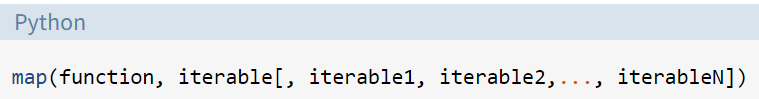

*function* can be any Python function that takes a number of arguments equal to the number of iterables you pass to map().

In [68]:
names=["hanna", "kate","bob"]

def myF(elem):
    return elem[0]+elem[-1]

print(map(myF,names))

Since map() returns an iterator (a map object), you’ll need call list() so that you can exhaust the iterator and turn it into a list object. Note that the original sequence doesn’t get modified in the process.

In [70]:
print(list(map(myF,['joe','jane'])))

['je', 'je']


Since map() is written in C and is highly optimized, its internal implied loop can be more efficient than a regular Python for loop. This is one advantage of using map().

A second advantage of using map() is related to memory consumption. With a for loop, you need to store the whole list in your system’s memory. With map(), you get items on demand, and only one item is in your system’s memory at a given time.

You can reimplement the example using a *lambda* function as follows

In [71]:
result=list(map(lambda x:x[0]+x[-1],['joe','jane']))
result

['je', 'je']

If you supply *multiple iterables to map()*, then the transformation function must take as many arguments as iterables you pass in

In [76]:
x=[1,2,3]
y=["Hanna","Bob","Jane"]

result=list(map(lambda x,y: y*x, y,x))
result

['Hanna', 'BobBob', 'JaneJaneJane']

In [77]:
names=["Hanna","Bob","Jane"]
list(map(str.upper, names))

['HANNA', 'BOB', 'JANE']

### The Filtering Problem - *filter()*

Let's assume that you need to process a list of numbers and return a new list containing only those numbers greater than 10

In [79]:
numbers = [-20, 12, 0, 1, 20]

def extractMyNumbers(myL):
    results=[]
    for item in myL:
        if item>10:
            results.append(item)
    return results

print(extractMyNumbers(numbers))


[12, 20]


Python provides a convenient built-in function, filter(), that abstracts out the logic behind filtering operation:

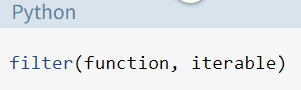

The first argument, *function*, must be a single-argument function. Typically, you provide a predicate (Boolean-valued) function to this argument. In other words, you provide a function that returns either True or False according to a specific condition

In [82]:
myNumbers = filter(lambda n: n > 10, numbers)
myNumbers

In [83]:
list(myNumbers)

[12, 20]

In [86]:
userLoginS=["hanna12","hanna","hanna!12"]
#useLog can include only letters and digits
goodLoginS=list(filter(lambda log:log.isalnum(),userLoginS))
goodLoginS

['hanna12', 'hanna']

# Generators in Python

### Generator Function

A generator function in Python is defined like a normal function, but whenever it needs to generate a value, it does so with the **yield** keyword rather than return. 

If the body of a *def* contains #yield, the function automatically becomes a Python generator function.

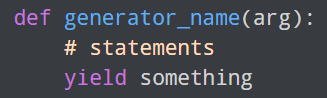

Python Generator functions return a *generator object* that is *iterable*

In [89]:
def myF(num, limit):
    while num<limit:
        yield num**2
        num+=1
        

    

In [90]:
myF(1,10)

<generator object myF at 0x000002919204C880>

In [92]:
for elem in myF(1,10):
    print(elem)

1
4
9
16
25
36
49
64
81


### Python Generator Expression

A generator expression has the following syntax:

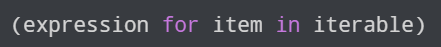

In [93]:
# create the generator object
squares_generator = (i * i for i in range(10))
list(squares_generator)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

Multiple generators can be used to pipeline a series of operations.

In [95]:
list(i * 10 for i in myF(5,10))

[250, 360, 490, 640, 810]

### Python List Comprehension

List comprehension offers a concise way to create a new list based on the values of an existing list by using generator expression

In [96]:
userLoginS=["hanna12","hanna","hanna!12"]

In [104]:
import random
userPasswordS=[random.choice(["!","$","#","%"])+userLog+str(random.randint(1,15)) for userLog in userLoginS]
userPasswordS

['%hanna1213', '#hanna6', '$hanna!1212']

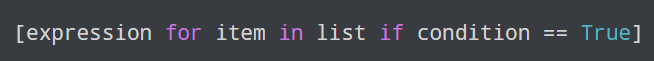

In [106]:
[userLog.upper() for userLog in userLoginS if len(userLog)>5]

['HANNA12', 'HANNA!12']

#  Treating functions as First-Class Objects

### First-Class Objects

This means that functions can be passed around and used as arguments, just like any other object like str, int, float, list, and so on. 

In [107]:
def sayHi(name):
    return f"Hi {name}"

In [109]:
def sayHello(name):
    return f"Hello {name}"

In [110]:
def greetPerson(howToGreetFun, person):
    print(howToGreetFun(person))
    

In [111]:
greetPerson(sayHi,"Hanna")

Hi Hanna


In [112]:
greetPerson(sayHello,"Hanna")

Hello Hanna


In [113]:
def forHanna(greetF):
    return greetF("Hanna")


def forKate(greetF):
    return greetF("Kate")

In [115]:
print(forHanna(sayHi))
print(forKate(sayHello))

Hi Hanna
Hello Kate


def greetPerson(howToGreetFun):


In [108]:
hiBob=sayHi('Bob')
hiBob

'Hi Bob'

### Inner Functions & Functions as Return Values

It’s possible to define functions inside other functions. 

You can also create **higher-order functions** in Python. Higher-order functions are functions that operate on other functions by taking them as arguments, returning them, or both.

In [116]:
def wrapper(num):
    def innerF(b):
        return b+num

But because of their local scope, the inner functions aren’t available outside of the parent() function

In [117]:
b1=innerF(2)

NameError: name 'innerF' is not defined

### Retaining State in a Closure

A **closure** causes the inner function to retain the state of its environment when called. 

The **closure** isn’t the inner function itself but *the inner function along with its enclosing environment*. 

The closure captures the local variables and name in the containing function and keeps them around.

Python also allows you to return functions from functions. 

In [118]:
def wrapper(num):
    def innerF(b):
        return b+num
    
    return innerF

wrapper() - a closure factory function. This means that it creates a new closure each time it’s called and then returns it to the caller

innerF() - an inner function that takes a single argument, b, and returns the result of the expression 

return innerF - returns innerF as a function object, without calling it.

In [121]:
wrapper5=wrapper(5)
wrapper5

<function __main__.wrapper.<locals>.innerF(b)>

In [122]:
wrapper5(10)

15

Where does *innerF*() get the value of *num* from? This is where the *closure* comes into play

What Python does when you call *wrapper*():
* Define a new instance of innerF(), which takes a single argument *b*.
* Take a snapshot of the surrounding state of innerF(), which includes *num* with its current value
* Return innerF() along with its whole surrounding state.

This way, when you call the instance of innerF() - wrapper5, returned by wrapper(), you’ll see that the function remembers the value of *num*.

In [123]:
def wrapper(num):
    def innerF1(b):
        return b+num
    
    def innerF2(b):
        return b-num
    
    if num%2==0:
        return innerF1
    else:
        return innerF2

In [127]:
processing=wrapper(5)
processing(2)

-3

In [128]:
processing=wrapper(4)
processing(2)

6

In [125]:
wrapper(5)(2)

-3

In [126]:
wrapper(2)(2)

4

# Decorators in Python

*Decorators* are higher-order functions that take a callable (function, method, class) as an argument and return another callable.

A Python decorator is a function that takes in a function and returns it by adding some functionality

In [131]:
def decorator1(func):
    def wrapper():
        print("Hello, let's add something before....")
        func()
        print("And let's something after...")
    return wrapper

def sayHi():
    print("Hi!")

sayNewHi = decorator1(sayHi)
sayNewHi()

Hello, let's add something before....
Hi!
And let's something after...


**@decorator** - Python allows you to use decorators in a simpler way with the @ symbol, sometimes called the pie syntax

In [132]:
@decorator1
def sayHi():
    print("Hi!")
    
sayHi()

Hello, let's add something before....
Hi!
And let's something after...


**Decorating Functions With Arguments**

Use **args* and ***kwargs* in the inner wrapper function. Then it’ll accept an arbitrary number of positional and keyword arguments

In [136]:
def decorator2(func):
    def wrapper(*args, **kwargs):
        print("Hello, let's add something before....")
        func(*args, **kwargs)
        print("And let's something after...")
    return wrapper

In [138]:
@decorator2
def sayHi(name):
    print("Hi!", name)
    
sayHi("Hanna")

Hello, let's add something before....
Hi! Hanna
And let's something after...


**Returning Values From Decorated Functions**

You need to make sure the wrapper function returns the return value of the decorated function

In [139]:
def decorator3(func):
    def wrapper(*args, **kwargs):
        print("Hello, let's add something before....")
        return func(*args, **kwargs)
        print("And let's something after...") # will not be used
    return wrapper

In [140]:
@decorator3
def sayBigHi(name):
    return "HI!!!"+name
    
print(sayBigHi("Hanna"))

Hello, let's add something before....
HI!!!Hanna


**Chaining Decorators in Python**

Multiple decorators can be chained in Python.

To chain decorators in Python, we can apply multiple decorators to a single function by placing them one after the other, with the most inner decorator being applied first.

In [141]:
def star(func):
    def inner(*args, **kwargs):
        print("*" * 15)
        func(*args, **kwargs)
        print("*" * 15)
    return inner


def percent(func):
    def inner(*args, **kwargs):
        print("%" * 15)
        func(*args, **kwargs)
        print("%" * 15)
    return inner


@star
@percent
def printer(msg):
    print(msg)

printer("Hello")

***************
%%%%%%%%%%%%%%%
Hello
%%%%%%%%%%%%%%%
***************


https://python-course.eu/advanced-python/currying-in-python.php

# Python zip() Function

Python’s **zip()** function is defined as *zip(*iterables)*.

The function takes in iterables as arguments and returns an iterator. 

This iterator generates a series of tuples containing elements from each iterable. zip() can accept any type of iterable, such as files, lists, tuples, dictionaries, sets, and so on.

If you use zip() with *n* arguments, then the function will return an iterator that generates tuples of length *n*.

In [142]:
myLetters = ["a", "b", "c", "d", "e", "f"]
myNumbers=[4,9,12,16,0,3]

zip(myNumbers,myLetters)

The application of zip returns an iterator, which is capable of producing tuples. It is combining the first items of each iterable (in our example lists) into a tuple, after this it combines the second items and so on. It stops when one of them is exhausted, i.e. there are no more items available.

In [143]:
for item in zip(myNumbers,myLetters):
    print(item)

(4, 'a')
(9, 'b')
(12, 'c')
(16, 'd')
(0, 'e')
(3, 'f')


In [145]:
location = ["Chestermere", "Okotoks", 
            "High River", "Red Deer"]
air_quality = [163,58,55,52]
temperatures = [3.0, 15, 19, 11]

for city in zip(range(1,len(location)+1),location,air_quality,temperatures):
    print(city)


(1, 'Chestermere', 163, 3.0)
(2, 'Okotoks', 58, 15)
(3, 'High River', 55, 19)
(4, 'Red Deer', 52, 11)
